*last update 20201231*

*by MAK*

# Mounting Gdrive

In [ ]:
from google.colab import drive
from google.colab import files
drive.mount('/content/drive/')
import os
%cd /content/drive/My\ Drive/Everywhere/PCs/
%ls
!echo current directory is $(pwd)

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
/content/drive/My Drive/Everywhere/PCs
DFTdata.xlsx        Dublin_Data_T60.mat  sCell/          Soares_T60.xlsx
Dublin_Data_RT.mat  ExSysR.ipynb         Soares_RT.xlsx  z.MyLib/
current directory is /content/drive/My Drive/Everywhere/PCs


# Importing all required packages ...

In [ ]:
import time
import pandas as pd
import numpy as np
from scipy.interpolate import UnivariateSpline
import matplotlib.pyplot as plt
from random import random
from skimage.io import imread, imshow
from PIL import Image
import cv2

# Processing deposited DFT data 



## Reading Data ....

and averaging over temperatures while smoothing and trimming to Spectra within (400, 3700) cm-1, followed by normalization

In [ ]:
tic = time.clock()
file = 'DFTdata.xlsx'
xl = pd.ExcelFile(file)
List = xl.sheet_names
xs = np.linspace(400, 3700, 1000)
FP_norm = np.transpose(xs)
FP_avg = np.transpose(xs)
for item in List: 
  data = xl.parse(item)
  np_data = data.to_numpy()
  tr_data = np_data[ np.where( np_data[:, 0] > 400 ) ]
  x298 = tr_data[:, 0]
  y298 = tr_data[:, 1]
  spl = UnivariateSpline(x298, y298)
  spl.set_smoothing_factor(0.00000001)
  ys298 = spl(xs)
  x343 = tr_data[:, 2]
  y343 = tr_data[:, 3]
  spl = UnivariateSpline(x343, y343)
  spl.set_smoothing_factor(0.00000001)
  ys343 = spl(xs)
  x353 = tr_data[:, 4]
  y353 = tr_data[:, 5]
  spl = UnivariateSpline(x353, y353)
  spl.set_smoothing_factor(0.00000001)
  ys353= spl(xs)
  x363 = tr_data[:, 6]
  y363 = tr_data[:, 7]
  spl = UnivariateSpline(x363, y363)
  spl.set_smoothing_factor(0.00000001)
  ys363 = spl(xs)
  x_avg = xs
  y_avg = (ys298 + ys343 + ys353 + ys363) / 4
  y_avg = abs(y_avg)
  FP_avg = np.vstack((FP_avg, np.transpose(y_avg)))
  MIN = y_avg.min()
  if MIN == 0:
    MIN = 1e-8
  MAX = y_avg.max()
  norm_y = (y_avg - MIN) / (MAX - MIN)
  FP_norm = np.vstack((FP_norm, np.transpose(norm_y)))
toc = time.clock()
print('elapsed time = ', toc - tic, ' s')

elapsed time =  10.101638  s


## Ploting data 

IBF


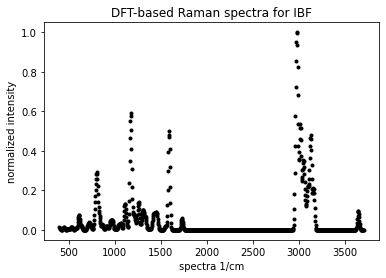

NCTA


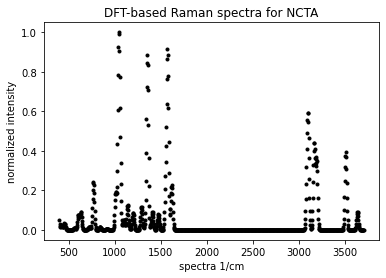

CO1


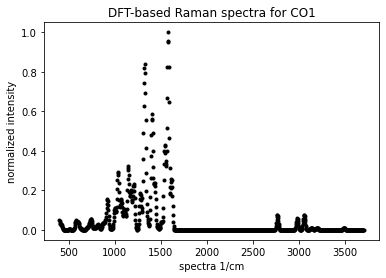

CO2


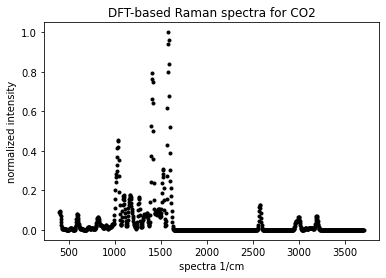

CO3


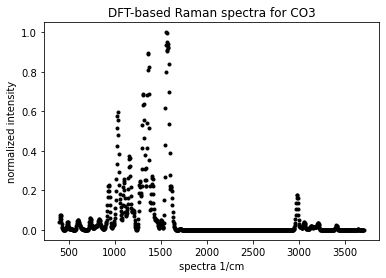

CO4


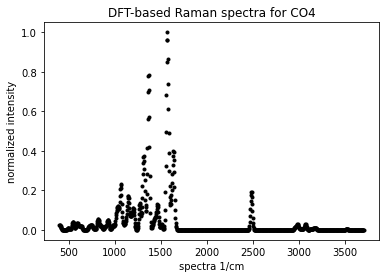

CO5


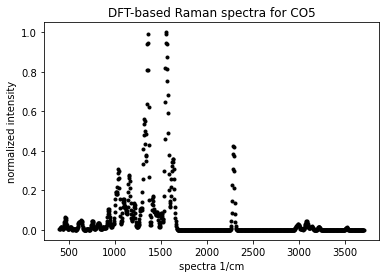

CO6


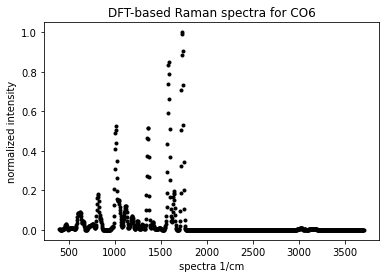

CO7


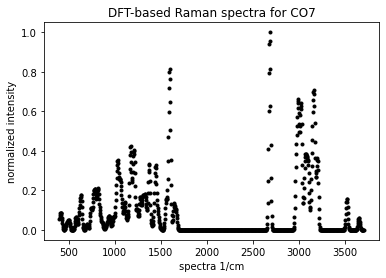

CO8


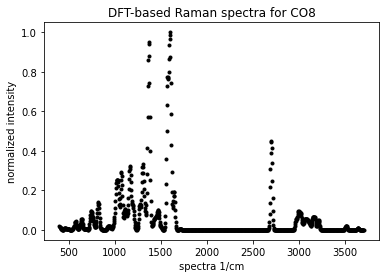

CO9


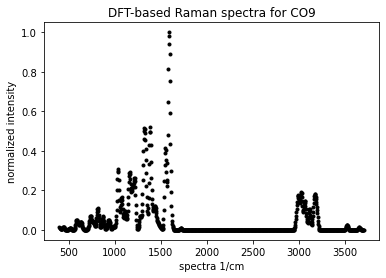

DI1


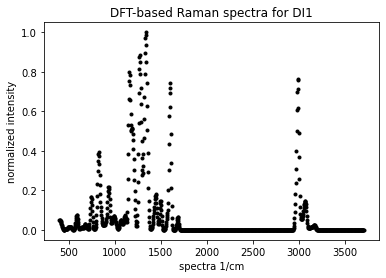

DI2


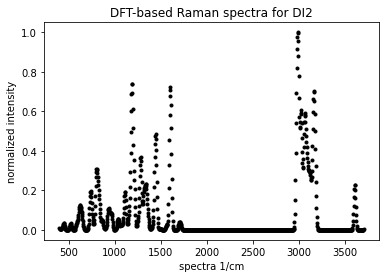

DI3


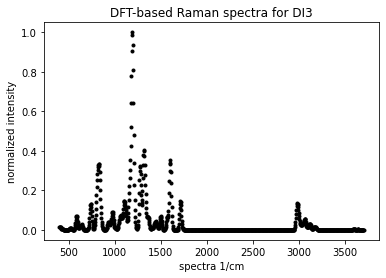

DN1


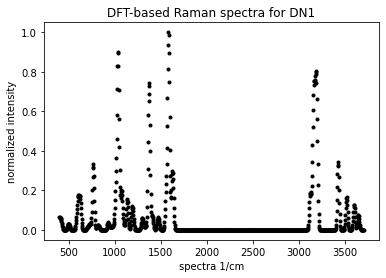

DN2


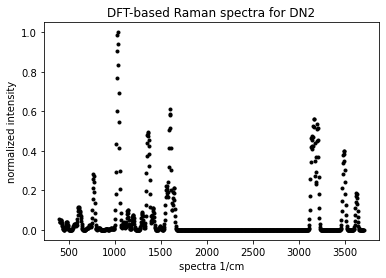

DN3


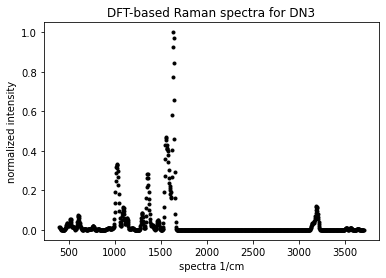

DN4


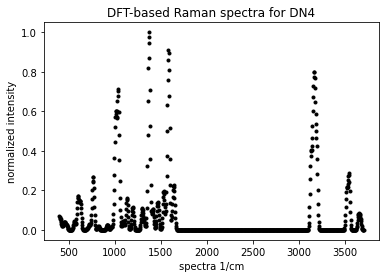

DN5


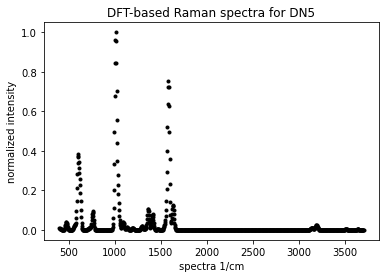

DN6


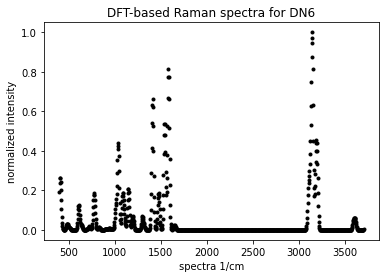

DN7


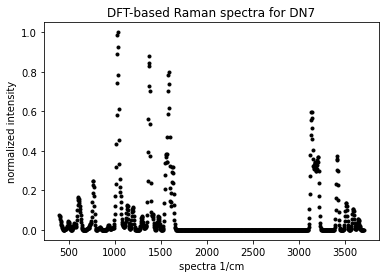

DN8


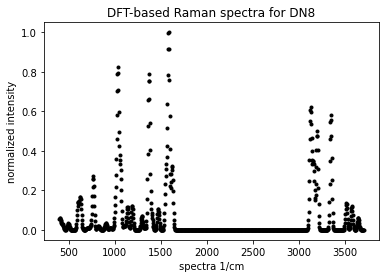

DN9


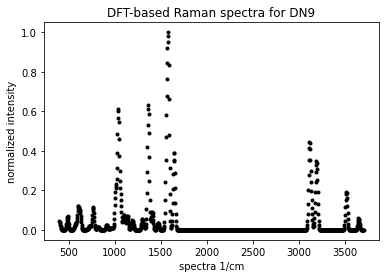

elapsed time =  4.462949999999999  s


In [ ]:
tic = time.clock()
i = 0
for item in List: 
  print(item)
  plt.figure()
  plt.plot((np.linspace(400, 3700, 1000)), FP_norm[i+1,:], 'k.') 
  plt.xlabel('spectra 1/cm')
  plt.ylabel('normalized intensity')
  plt.title('DFT-based Raman spectra for '+ item)
  plt.show()
  i = i + 1
toc = time.clock()
print('elapsed time = ', toc - tic, ' s')

## Compacting datasets 

In [ ]:
tic = time.clock()
FP_spectra = np.transpose(np.linspace(400, 3700, 1000))
FP_intensity = np.transpose(FP_norm[1:,:])
Particle_Name = np.array(List)
#Particle_ID = np.array([1000, 2000, \
#                        1, 2, 3, 4, 5, 6, 12, 13, 18, \
#                        7, 8, 17, \
#                        9, 10, 11, 14, 15, 16, 19, 20, 21])
toc = time.clock()
print('elapsed time = ', toc - tic, ' s')

elapsed time =  0.0004139999999992483  s


## Calculating *probaility* of pairs' as observed in **Fingerprints**

Probabilities when all pairs can occur
DN =  42.857142857142854 %
DI =  14.285714285714286 %
CO =  42.857142857142854 %


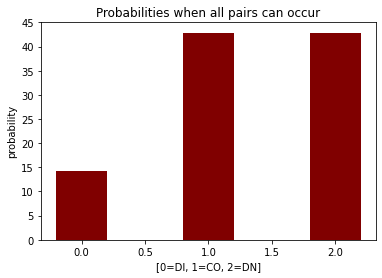

Probabilities when all pairs can occur ignoring DNs
DI =  25.0 %
CO =  75.0 %


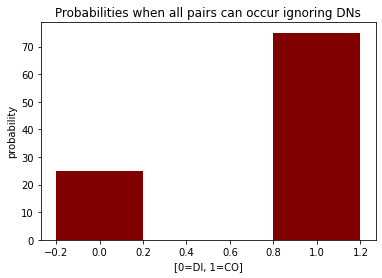

elapsed time =  0.395068000000002  s


In [ ]:
tic = time.clock()
nDI=0
nDN=0
nCO=0
for item in range(len(List)):
  if 'DI' in List[item-1]:
    nDI = nDI + 1
  if 'DN' in List[item-1]:
    nDN = nDN + 1
  if 'CO' in List[item-1]:
    nCO = nCO + 1
Observed_DN_no = np.array([100 * nDI / (nDI + nCO), 100 * nCO / (nDI + nCO)])
Observed_DN_yes = np.array([100 * nDI / (nDI + nDN + nCO), \
                   100 * nCO / (nDI + nDN + nCO), \
                   100 * nDN / (nDI + nDN + nCO)])
print('Probabilities when all pairs can occur')
print('DN = ', 100 * nDN / (nDI + nDN + nCO), '%')
print('DI = ', 100 * nDI / (nDI + nDN + nCO), '%')
print('CO = ', 100 * nCO / (nDI + nDN + nCO), '%')
plt.figure()
plt.bar(range(len(Observed_DN_yes)), Observed_DN_yes, \
        color ='maroon', width = 0.4)
plt.xlabel('[0=DI, 1=CO, 2=DN]')
plt.ylabel('probability')
plt.title('Probabilities when all pairs can occur')
plt.show()
print('Probabilities when all pairs can occur ignoring DNs')
print('DI = ', 100 * nDI / (nDI + nCO), '%')
print('CO = ', 100 * nCO / (nDI + nCO), '%')
plt.figure()
plt.bar(range(len(Observed_DN_no)), Observed_DN_no, \
        color ='maroon', width = 0.4)
plt.xlabel('[0=DI, 1=CO]')
plt.ylabel('probability')
plt.title('Probabilities when all pairs can occur ignoring DNs')
plt.show()
toc = time.clock()
print('elapsed time = ', toc - tic, ' s')

## Showing correlation among spectra 

IBF
NCTA
CO1
contains -NCTA- and -IBF- CoCryst
checking: -NCTA- vs. -NCTA +  IBF- CoCryst


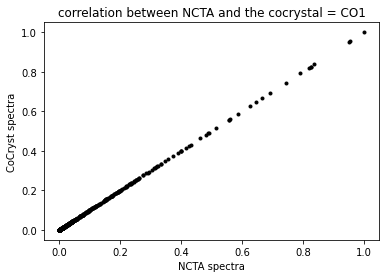

checking: -IBF- vs. -NCTA + IBF- CoCryst


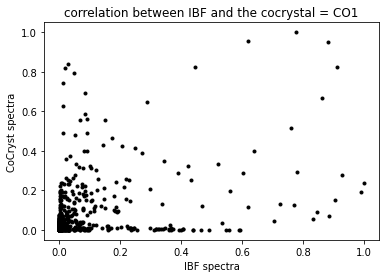

CO2
contains -NCTA- and -IBF- CoCryst
checking: -NCTA- vs. -NCTA +  IBF- CoCryst


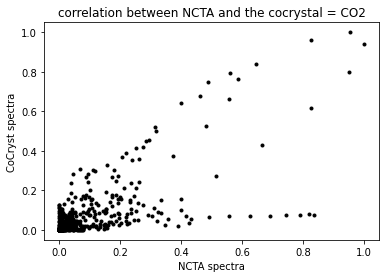

checking: -IBF- vs. -NCTA + IBF- CoCryst


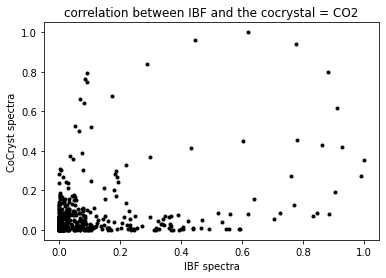

CO3
contains -NCTA- and -IBF- CoCryst
checking: -NCTA- vs. -NCTA +  IBF- CoCryst


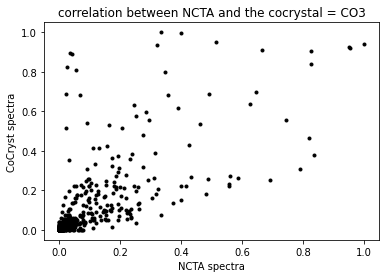

checking: -IBF- vs. -NCTA + IBF- CoCryst


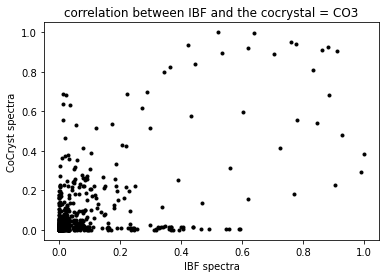

CO4
contains -NCTA- and -IBF- CoCryst
checking: -NCTA- vs. -NCTA +  IBF- CoCryst


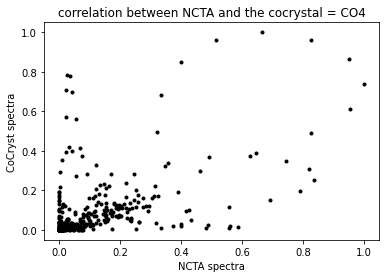

checking: -IBF- vs. -NCTA + IBF- CoCryst


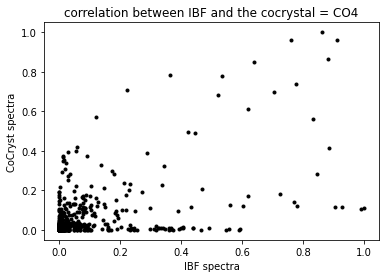

CO5
contains -NCTA- and -IBF- CoCryst
checking: -NCTA- vs. -NCTA +  IBF- CoCryst


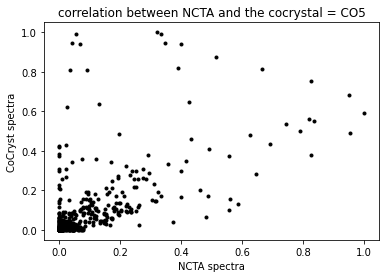

checking: -IBF- vs. -NCTA + IBF- CoCryst


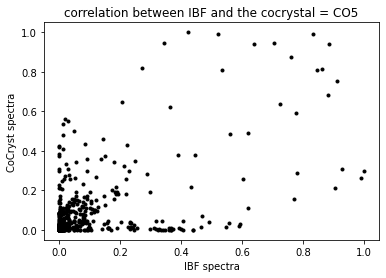

CO6
contains -NCTA- and -IBF- CoCryst
checking: -NCTA- vs. -NCTA +  IBF- CoCryst


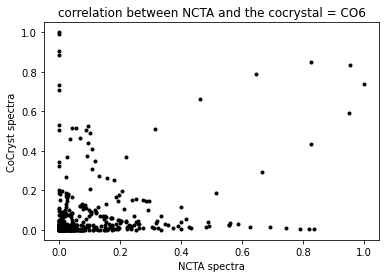

checking: -IBF- vs. -NCTA + IBF- CoCryst


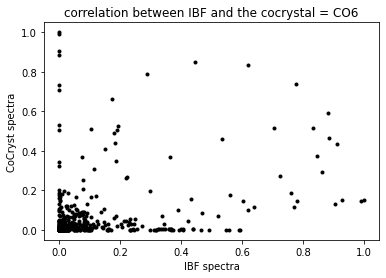

CO7
contains -NCTA- and -IBF- CoCryst
checking: -NCTA- vs. -NCTA +  IBF- CoCryst


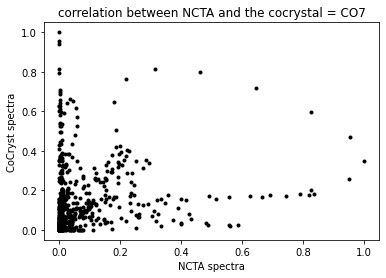

checking: -IBF- vs. -NCTA + IBF- CoCryst


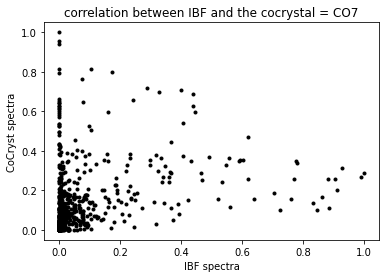

CO8
contains -NCTA- and -IBF- CoCryst
checking: -NCTA- vs. -NCTA +  IBF- CoCryst


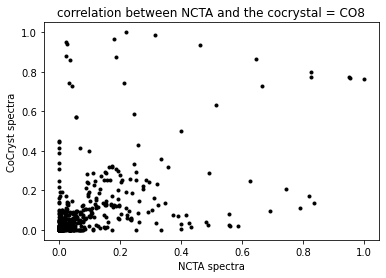

checking: -IBF- vs. -NCTA + IBF- CoCryst


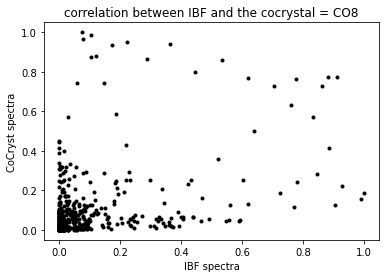

CO9
contains -NCTA- and -IBF- CoCryst
checking: -NCTA- vs. -NCTA +  IBF- CoCryst


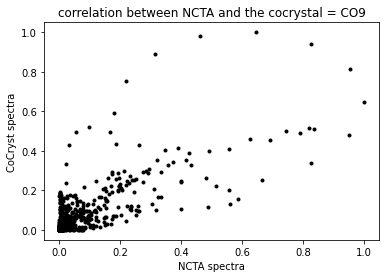

checking: -IBF- vs. -NCTA + IBF- CoCryst


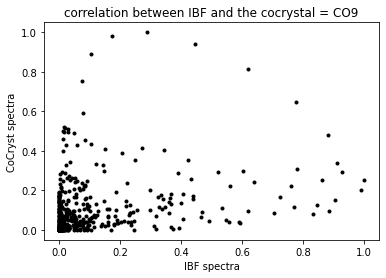

DI1
contains -IBF- dimer
checking: -IBF- vs. -IBF- dimer


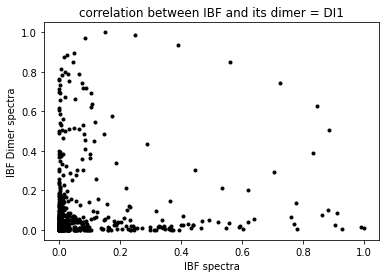

DI2
contains -IBF- dimer
checking: -IBF- vs. -IBF- dimer


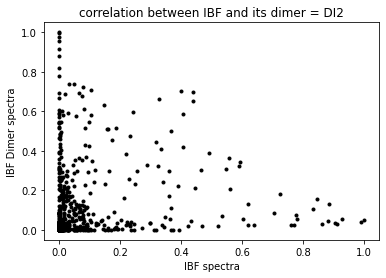

DI3
contains -IBF- dimer
checking: -IBF- vs. -IBF- dimer


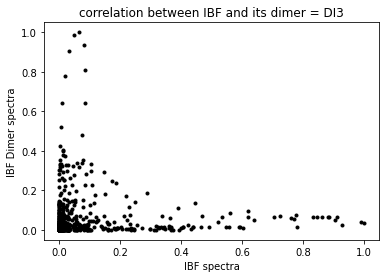

DN1
contains -NCTA- dimer
checking: -NCTA- vs. -NCTA- dimer


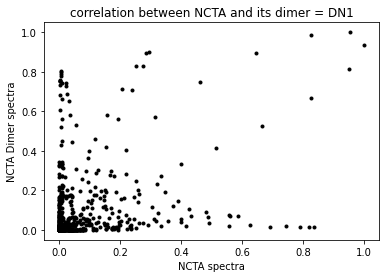

DN2
contains -NCTA- dimer
checking: -NCTA- vs. -NCTA- dimer


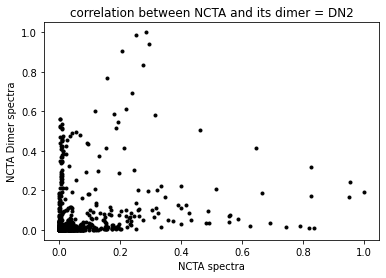

DN3
contains -NCTA- dimer
checking: -NCTA- vs. -NCTA- dimer


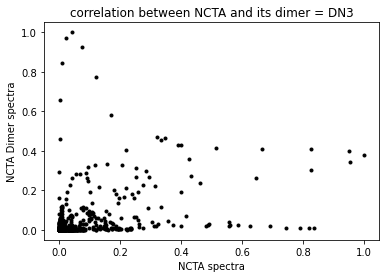

DN4
contains -NCTA- dimer
checking: -NCTA- vs. -NCTA- dimer


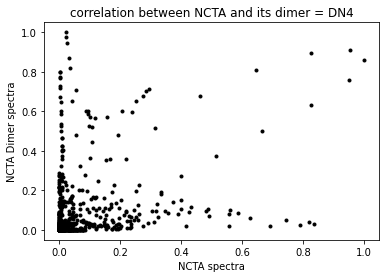

DN5
contains -NCTA- dimer
checking: -NCTA- vs. -NCTA- dimer


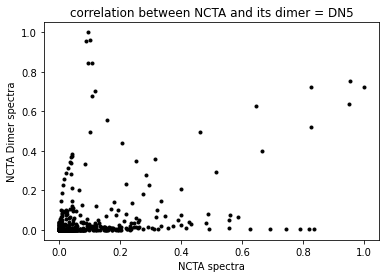

DN6
contains -NCTA- dimer
checking: -NCTA- vs. -NCTA- dimer


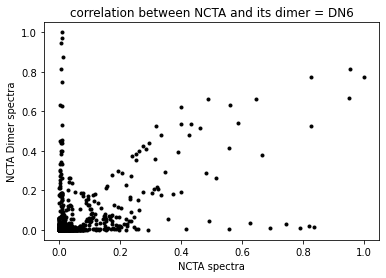

DN7
contains -NCTA- dimer
checking: -NCTA- vs. -NCTA- dimer


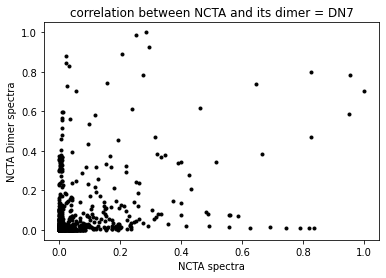

DN8
contains -NCTA- dimer
checking: -NCTA- vs. -NCTA- dimer


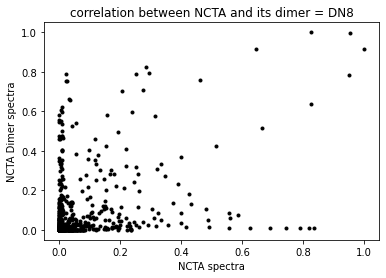

DN9
contains -NCTA- dimer
checking: -NCTA- vs. -NCTA- dimer


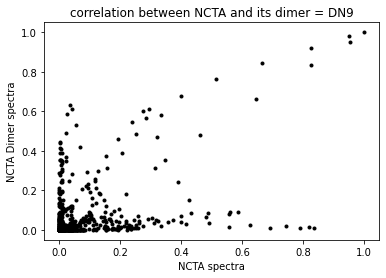

elapsed time =  5.613536  s


In [ ]:
tic = time.clock()
for item in range(len(List)):
  print(List[item])
  if 'DI' in List[item]:
    print('contains -IBF- dimer')
    print('checking: -IBF- vs. -IBF- dimer')
    plt.figure()
    plt.plot(FP_intensity[:,1], FP_intensity[:,item], 'k.')
    plt.xlabel('IBF spectra')
    plt.ylabel('IBF Dimer spectra')
    plt.title('correlation between IBF and its dimer = ' + List[item])
    plt.show()
  if 'DN' in List[item]:
    print('contains -NCTA- dimer')
    print('checking: -NCTA- vs. -NCTA- dimer')
    plt.figure()
    plt.plot(FP_intensity[:,2], FP_intensity[:,item], 'k.')
    plt.xlabel('NCTA spectra')
    plt.ylabel('NCTA Dimer spectra')
    plt.title('correlation between NCTA and its dimer = ' + List[item])
    plt.show()
  if 'CO' in List[item]:
    print('contains -NCTA- and -IBF- CoCryst')
    print('checking: -NCTA- vs. -NCTA +  IBF- CoCryst')
    plt.figure()
    plt.plot(FP_intensity[:,2], FP_intensity[:,item], 'k.')
    plt.xlabel('NCTA spectra')
    plt.ylabel('CoCryst spectra')
    plt.title('correlation between NCTA and the cocrystal = ' + List[item])
    plt.show()
    print('checking: -IBF- vs. -NCTA + IBF- CoCryst')
    plt.figure()
    plt.plot(FP_intensity[:,1], FP_intensity[:,item], 'k.')
    plt.xlabel('IBF spectra')
    plt.ylabel('CoCryst spectra')
    plt.title('correlation between IBF and the cocrystal = ' + List[item])
    plt.show()   
toc = time.clock()
print('elapsed time = ', toc - tic, ' s')

# dVFS model

## Building main MATRIX 

In [ ]:
tic = time.clock()
# first column of big MATRIX - fixed value = 1
MATRIX = np.ones((FP_spectra.shape[0],1))
# pair data 
MATRIX = np.hstack((MATRIX, FP_intensity))
# binaries of (i,j) 
i = 0
for particles in List:
  j = 0
  for particles in List:
    TEMP = np.zeros((FP_spectra.shape[0],1))
    TEMP[:,0] = FP_intensity[:,i] * FP_intensity[:,j]
    MATRIX = np.hstack((MATRIX, TEMP))
    j = j + 1
  i = i + 1
# triplets of (i, j, k)
i = 0
for particles in List:
  j = 0
  for particles in List:
    k = 0
    for particles in List:
      TEMP = np.zeros((FP_spectra.shape[0],1))
      TEMP[:,0] = FP_intensity[:,i] * FP_intensity[:,j] * FP_intensity[:,k]
      MATRIX = np.hstack((MATRIX, TEMP))
      k = k + 1
    j = j + 1
  i = i + 1
toc = time.clock()
print('elapsed time = ', toc - tic, ' s')

elapsed time =  200.01244  s


## Computations on MATRIX 

In [ ]:
tic = time.clock()
tMATRIX = np.transpose(MATRIX)
tMATRIX_MATRIX = np.matmul(tMATRIX, MATRIX)
inv_tMATRIX_MATRIX = np.linalg.pinv(tMATRIX_MATRIX)
toc = time.clock()
print('elapsed time = ', toc - tic, ' s')

elapsed time =  3235.641643  s


## Checking dVFS prediction for fingerprints

In [ ]:
tic = time.clock()
FP_COEFF = np.zeros((MATRIX.shape[1],len(List)-2))
FP_ERR = np.zeros((len(List)-2,1))
i = 0
j = 0
for particle in List:
  if i > 1: 
    Y = FP_intensity[:,i]
    tMATRIX_Y = np.matmul(tMATRIX, Y) 
    FP_COEFF[:, j] = np.matmul(inv_tMATRIX_MATRIX, tMATRIX_Y)
    Y_cal = np.matmul(MATRIX, FP_COEFF[:, j])
    Err = abs(Y - Y_cal)
    FP_ERR[j,0] = Err.sum()
    j = j + 1
  i = i + 1
toc = time.clock()
print('elapsed time = ', toc - tic, ' s')

elapsed time =  7.779015000000072  s


## Ploting error for FPs

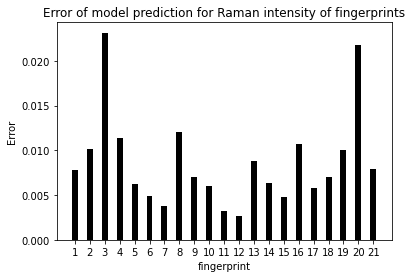

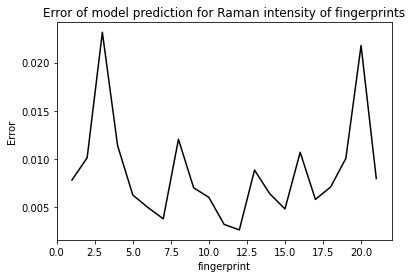

In [ ]:
plt.figure()
plt.bar(range(1,FP_ERR.shape[0]+1),FP_ERR[:,0], color ='black', width = 0.4)
plt.xlabel('fingerprint')
plt.ylabel('Error')
plt.title('Error of model prediction for Raman intensity of fingerprints')
plt.xticks(range(1,FP_ERR.shape[0]+1))
plt.show()
plt.figure()
plt.plot(range(1,FP_ERR.shape[0]+1),FP_ERR[:,0], 'k-')
plt.xlabel('fingerprint')
plt.ylabel('Error')
plt.title('Error of model prediction for Raman intensity of fingerprints')
plt.show()

## Saving dVFS computations for fingerprints as .txt files [mainly MATRIX for future use]

In [ ]:
tic = time.clock()
np.savetxt("FP_COEFF.txt", FP_COEFF, delimiter=",")
np.savetxt("FP_MATRIX.txt", MATRIX, delimiter=",")
np.savetxt("FP_tMATRIX.txt", tMATRIX, delimiter=",")
np.savetxt("FP_tMATRIX_MATRIX.txt", tMATRIX_MATRIX, delimiter=",")
np.savetxt("FP_inv_tMATRIX_MATRIX.txt", inv_tMATRIX_MATRIX, delimiter=",")
np.savetxt("FP_ERR.txt", FP_ERR, delimiter=",")
toc = time.clock()
print('elapsed time = ', toc - tic, ' s')

elapsed time =  414.02990599999976  s


# Testing dVFS prediciton capability for mixture spectra 

## Creating dummy mixtures 

In [ ]:
nMIX = 10000
tic = time.clock()
MIX_intensity = np.zeros((FP_intensity.shape[0], nMIX)) 
MIX_frQ = np.zeros((nMIX, FP_intensity.shape[1])) 
for mixture in range(nMIX):
  i = 0
  rnd = np.zeros((1,len(List)))
  for particle in List:
      rnd[0,i] = random() * random() * random()
      i = i + 1
  RND = rnd / np.sum(rnd)
  MIX_frQ[mixture, :] = RND
  i = 0
  TEMP = 0
  for particle in List:
    TEMP = TEMP + FP_intensity[:, i] * RND[0, i]
    i = i + 1
  MIX_intensity[:, mixture] = TEMP
toc = time.clock()
print('elapsed time = ', toc - tic, ' s')

elapsed time =  1.4218299999993178  s


## Making predictions for dummy mixtures

In [ ]:
tic = time.clock()
MIX_ERR = np.zeros((nMIX,1))
MIX_COEFF = np.zeros((MATRIX.shape[1],nMIX))
i = 0
j = 0
for mixture in range(nMIX):
    Y = MIX_intensity[:, mixture]
    tMATRIX_Y = np.matmul(tMATRIX, Y) 
    MIX_COEFF[:, mixture] = np.matmul(inv_tMATRIX_MATRIX, tMATRIX_Y)
    Y_cal = np.matmul(MATRIX, MIX_COEFF[:, mixture])
    Err = abs(Y - Y_cal)
    MIX_ERR[mixture,0] = Err.sum()
toc = time.clock()
print('elapsed time = ', toc - tic, ' s')

elapsed time =  3690.9530830000003  s


## Ploting error for dummy mixtures 

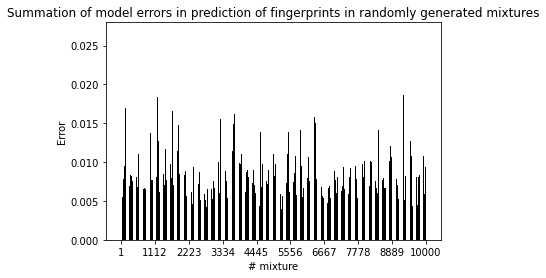

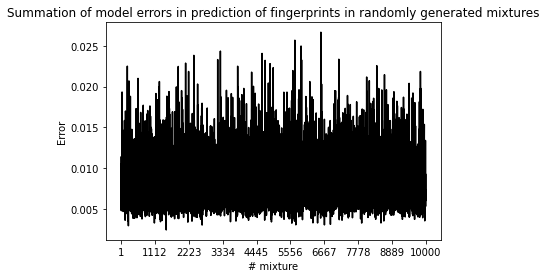

In [ ]:
plt.figure()
plt.bar(range(1,MIX_ERR.shape[0]+1),MIX_ERR[:,0], color ='black', width = 0.5)
plt.xlabel('# mixture')
plt.ylabel('Error')
plt.title('Summation of model errors in prediction of fingerprints in randomly generated mixtures')
plt.xticks(np.linspace(1.0, 10000, num=10))
plt.show()
plt.figure()
plt.plot(range(1,MIX_ERR.shape[0]+1),MIX_ERR[:,0], 'k-')
plt.xlabel('# mixture')
plt.ylabel('Error')
plt.title('Summation of model errors in prediction of fingerprints in randomly generated mixtures')
plt.xticks(np.linspace(1.0, 10000, num=10))
plt.show()

## Saving dVFS prediciton performance for dummy mixutres 

In [ ]:
tic = time.clock()
np.savetxt("MIX_frQ.txt", MIX_frQ, delimiter=",")
np.savetxt("MIX_intensity.txt", MIX_intensity, delimiter=",")
np.savetxt("MIX_COEFF.txt", MIX_COEFF, delimiter=",")
np.savetxt("MIX_tMATRIX_MATRIX.txt", tMATRIX_MATRIX, delimiter=",")
np.savetxt("MIX_inv_tMATRIX_MATRIX.txt", inv_tMATRIX_MATRIX, delimiter=",")
np.savetxt("MIX_sumabsERR.txt", MIX_ERR, delimiter=",")
toc = time.clock()
print('elapsed time = ', toc - tic, ' s')

elapsed time =  534.1690629999994  s


## Ploting a sample prediciting performance with probability report on a random mixture 

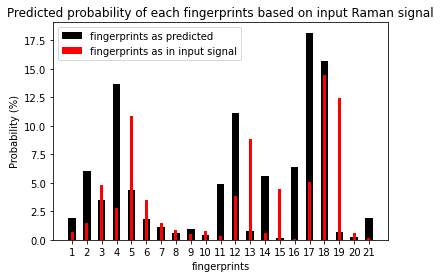

elapsed time =  0.8764809999993304  s


In [ ]:
# creating a new mixture sample 
nMIX = 1
tic = time.clock()
new_MIX_intensity = np.zeros((FP_intensity.shape[0], nMIX)) 
new_MIX_frQ = np.zeros((nMIX, FP_intensity.shape[1])) 
dVFS_MIX_frQ = np.zeros((nMIX, FP_intensity.shape[1] - 2)) 
new_MIX_COEFF = np.zeros((MATRIX.shape[1],nMIX))
for mixture in range(nMIX):
  i = 0
  rnd = np.zeros((1,len(List)))
  for particle in List:
      rnd[0,i] = random() * random() * random()
      i = i + 1
  RND = rnd / np.sum(rnd)
  new_MIX_frQ[mixture, :] = RND
  i = 0
  TEMP = 0
  for particle in List:
    TEMP = TEMP + FP_intensity[:, i] * RND[0, i]
    i = i + 1
  new_MIX_intensity[:, mixture] = TEMP
  new_Y = new_MIX_intensity[:, mixture]
  new_tMATRIX_Y = np.matmul(tMATRIX, new_Y) 
  new_MIX_COEFF[:, mixture] = np.matmul(inv_tMATRIX_MATRIX, new_tMATRIX_Y)
  dVFS_MIX_frQ[mixture, :] = 100 * new_MIX_COEFF[3:24, mixture] / np.sum(new_MIX_COEFF[3:24, mixture])
  ind = range(1, len(new_MIX_frQ[mixture, 1:-1]) + 1)
  plt.bar(ind, dVFS_MIX_frQ[mixture, :], color = 'black', width = 0.5, label = 'fingerprints as predicted')
  plt.bar(ind, 100 * new_MIX_frQ[mixture, 1:-1], color ='red', width = 0.2, label = 'fingerprints as in input signal')
  plt.xlabel('fingerprints')
  plt.ylabel('Probability (%)')
  plt.title('Predicted probability of each fingerprints based on input Raman signal')
  plt.xticks(ind)
  plt.legend(loc='best')
  plt.show()
  toc = time.clock()
print('elapsed time = ', toc - tic, ' s')

# dVFS model valiation using data collected from Literature

## Colorspaces

### RGB

RGB Color Representation


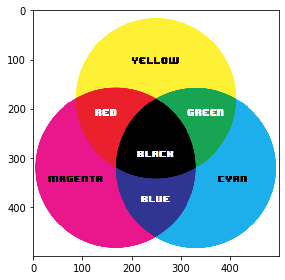

In [ ]:
print('RGB Color Representation')
imshow(imread('colorspace_RGB.png'))

### HSV

HSV Color Representation


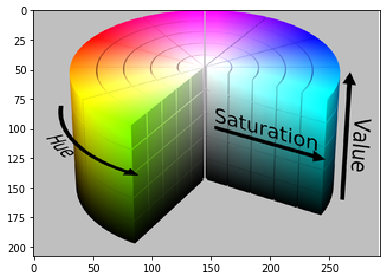

In [ ]:
print('HSV Color Representation')
imshow(imread('colorspace_HSV.png'))

### RGB 2 HSV

In [ ]:
tic = time.clock()
Black =  np.uint8([[[0,0,0]]]) 
White =  np.uint8([[[255,255,255]]]) 
Red =  np.uint8([[[255,0,0]]])	
Green	=  np.uint8([[[0,128,0]]]) 
Blue =  np.uint8([[[0,0,255]]])
Lime =  np.uint8([[[0,255,0]]])	
Yellow =  np.uint8([[[255,255,0]]])	
Cyan =  np.uint8([[[0,255,255]]])	
Magenta =  np.uint8([[[255,0,255]]])	
Silver =  np.uint8([[[192,192,192]]])	
Gray =  np.uint8([[[128,128,128]]])	
Maroon =  np.uint8([[[128,0,0]]])	
Olive	=  np.uint8([[[128,128,0]]])
Purple =  np.uint8([[[128,0,128]]])	
Teal =  np.uint8([[[0,128,128]]])	
Navy =  np.uint8([[[0,0,128]]])
hsv_Black =  cv2.cvtColor(Black, cv2.COLOR_RGB2HSV) 
hsv_White =  cv2.cvtColor(White, cv2.COLOR_RGB2HSV) 
hsv_Red =  cv2.cvtColor(Red, cv2.COLOR_RGB2HSV) 
hsv_Green	=  cv2.cvtColor(Green, cv2.COLOR_RGB2HSV) 
hsv_Blue =  cv2.cvtColor(Blue, cv2.COLOR_RGB2HSV) 
hsv_Lime =  cv2.cvtColor(Lime, cv2.COLOR_RGB2HSV) 
hsv_Yellow =  cv2.cvtColor(Yellow, cv2.COLOR_RGB2HSV) 
hsv_Magenta =  cv2.cvtColor(Magenta, cv2.COLOR_RGB2HSV) 
hsv_Magenta =  cv2.cvtColor(Magenta, cv2.COLOR_RGB2HSV) 	
hsv_Silver =  cv2.cvtColor(Silver, cv2.COLOR_RGB2HSV) 
hsv_Gray =  cv2.cvtColor(Gray, cv2.COLOR_RGB2HSV) 
hsv_Maroon =  cv2.cvtColor(Maroon, cv2.COLOR_RGB2HSV) 
hsv_Olive	=  cv2.cvtColor(Olive, cv2.COLOR_RGB2HSV) 
hsv_Purple =  cv2.cvtColor(Purple, cv2.COLOR_RGB2HSV) 	
hsv_Teal =  cv2.cvtColor(Teal, cv2.COLOR_RGB2HSV) 
hsv_Navy =  cv2.cvtColor(Navy, cv2.COLOR_RGB2HSV) 
toc = time.clock()
print('elapsed time = ', toc - tic, ' s')

elapsed time =  0.0030119999992166413  s


## Getting Off-Line data of Karimi-Jafari et al. 2019

### Link to source: 

In [ ]:
print('Off-Line data as reported in paper: ')
print('International Journal of Pharmaceutics 566 (2019) 745–755')
print('https://www.sciencedirect.com/science/article/abs/pii/S0378517319304740')

Off-Line data as reported in paper: 
International Journal of Pharmaceutics 566 (2019) 745–755
https://www.sciencedirect.com/science/article/abs/pii/S0378517319304740


### **Fig_2c** : Processing

exp_Offline_Fig_2c.png as deposited on HDD


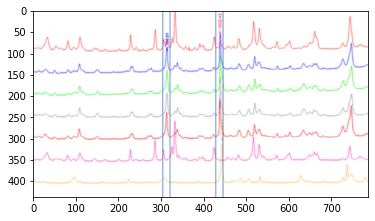

purging white out ...
purged white background


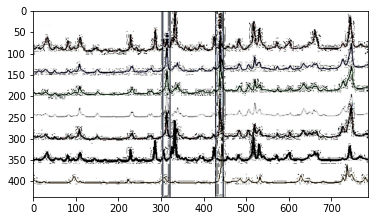

detected pixels to actual data -with some noise-


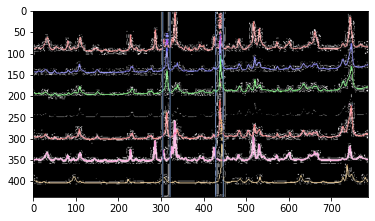

elapsed time =  2.981397999999899  s


In [ ]:
tic = time.clock()
# Raman spectra of molar ratio mixture of IBU-NIC extruded at various temperatures
myIMG = cv2.imread('exp_Offline_Fig_2c.png') 
myIMG = cv2.cvtColor(myIMG, cv2.COLOR_BGR2RGB)
print('exp_Offline_Fig_2c.png as deposited on HDD')
plt.imshow(myIMG)
plt.show()
hsv_myIMG = cv2.cvtColor(myIMG, cv2.COLOR_RGB2HSV)
print('purging white out ...')
light = (0, 0, 200) 
dark = (145, 60, 255)
mask = cv2.inRange(hsv_myIMG, light, dark)
result = cv2.bitwise_and(myIMG, myIMG, mask=mask)
print('purged white background')
plt.imshow(result)
plt.show()
print('detected pixels to actual data -with some noise-')
SPECTRA = myIMG - result
plt.imshow(SPECTRA)
plt.show()
DATA = np.zeros((SPECTRA.shape[0],SPECTRA.shape[1]))
for x in range(SPECTRA.shape[0]):
  for y in range(SPECTRA.shape[1]):
    RED = SPECTRA[x,y,0]
    GREEN = SPECTRA[x,y,1]
    BLUE = SPECTRA[x,y,2]
    if (RED == 0):
      if (GREEN == 0):
        if (BLUE == 0):
          DATA[x,y] = 0
    else:
      DATA[x,y] = 1
np.savetxt("exp_Offline_Fig_2c.csv", DATA, delimiter=",")
toc = time.clock()
print('elapsed time = ', toc - tic, ' s')

### **Fig_3c** : Processing

exp_Offline_Fig_3c.png as deposited on HDD


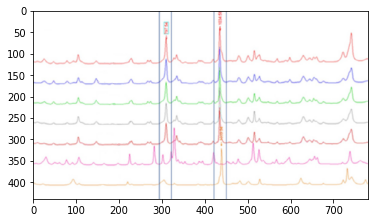

purging white out ...
purged white background


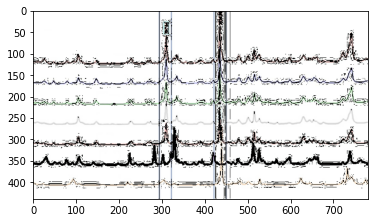

detected pixels to actual data -with some noise-


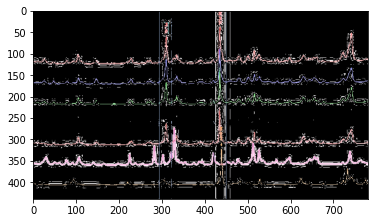

elapsed time =  3.193307999999888  s


In [ ]:
tic = time.clock()
# Raman spectra of molar ratio mixture of IBU-NIC extruded at various screw speeds
myIMG = cv2.imread('exp_Offline_Fig_3c.png') 
myIMG = cv2.cvtColor(myIMG, cv2.COLOR_BGR2RGB)
print('exp_Offline_Fig_3c.png as deposited on HDD')
plt.imshow(myIMG)
plt.show()
hsv_myIMG = cv2.cvtColor(myIMG, cv2.COLOR_RGB2HSV)
print('purging white out ...')
light = (0, 0, 200) 
dark = (145, 60, 255)
mask = cv2.inRange(hsv_myIMG, light, dark)
result = cv2.bitwise_and(myIMG, myIMG, mask=mask)
print('purged white background')
plt.imshow(result)
plt.show()
print('detected pixels to actual data -with some noise-')
SPECTRA = myIMG - result
plt.imshow(SPECTRA)
plt.show()
DATA = np.zeros((SPECTRA.shape[0],SPECTRA.shape[1]))
for x in range(SPECTRA.shape[0]):
  for y in range(SPECTRA.shape[1]):
    RED = SPECTRA[x,y,0]
    GREEN = SPECTRA[x,y,1]
    BLUE = SPECTRA[x,y,2]
    if (RED == 0):
      if (GREEN == 0):
        if (BLUE == 0):
          DATA[x,y] = 0
    else:
      DATA[x,y] = 1
np.savetxt("exp_Offline_Fig_3c.csv", DATA, delimiter=",")
toc = time.clock()
print('elapsed time = ', toc - tic, ' s')

### Loading data back 

In [ ]:
tic = time.clock()
file = 'KarimiJafari.xlsx'
xl = pd.ExcelFile(file)
ListKarimiJafari = xl.sheet_names
xs = np.linspace(200, 1700, 1000)
KarimiJafari = np.zeros((len(xs),len(ListKarimiJafari)))
KarimiJafari_norm = np.zeros((len(xs),len(ListKarimiJafari)))
i = 0
for item in ListKarimiJafari: 
  data = xl.parse(item)
  np_data = data.to_numpy()
  x = np_data[:, 0]
  y = np_data[:, 1]
  spl = UnivariateSpline(x, y)
  spl.set_smoothing_factor(1)
  ys = spl(xs)
  KarimiJafari[:,i] = ys
  MIN = ys.min()
  if MIN == 0:
    MIN = 1e-8
  MAX = ys.max()
  KarimiJafari_norm[:,i] = (ys - MIN) / (MAX - MIN)
  i = i + 1
toc = time.clock()
print('elapsed time = ', toc - tic, ' s')

elapsed time =  0.1343670000005659  s


In [ ]:
KarimiJafari_ERR = np.zeros((KarimiJafari_norm.shape[1],1))
KarimiJafari_COEFF = np.zeros((MATRIX.shape[1],KarimiJafari_norm.shape[1]))
for karimi in range(KarimiJafari_norm.shape[1]):
    Y = KarimiJafari_norm[:, karimi]
    tMATRIX_Y = np.matmul(tMATRIX, Y) 
    KarimiJafari_COEFF[:, karimi] = np.matmul(inv_tMATRIX_MATRIX, tMATRIX_Y)
    Y_cal = np.matmul(MATRIX, KarimiJafari_COEFF[:, karimi])
    Err = abs(Y - Y_cal)
    KarimiJafari_ERR[karimi,0] = Err.sum()
toc = time.clock()
print('elapsed time = ', toc - tic, ' s')

elapsed time =  6.19065000000046  s


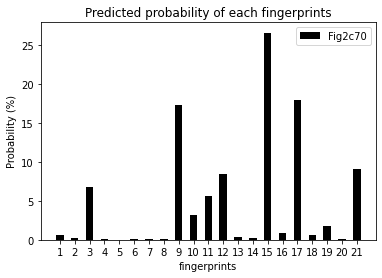

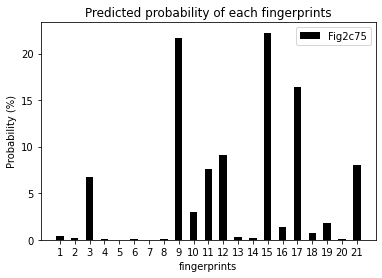

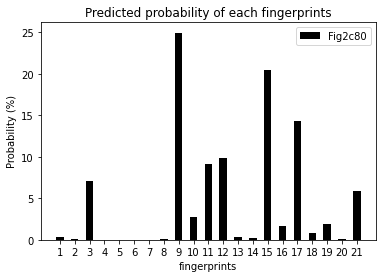

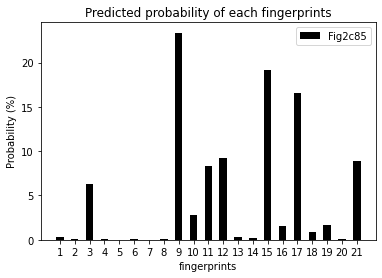

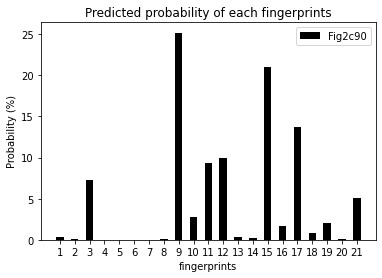

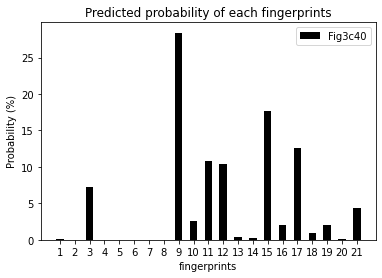

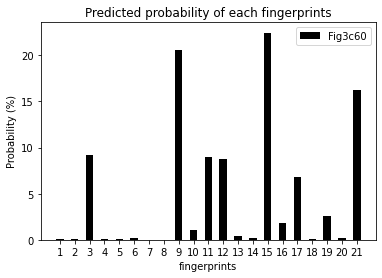

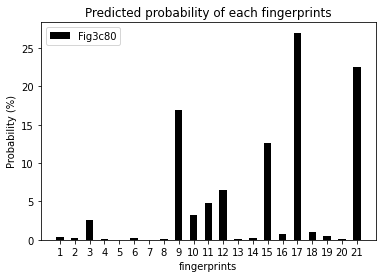

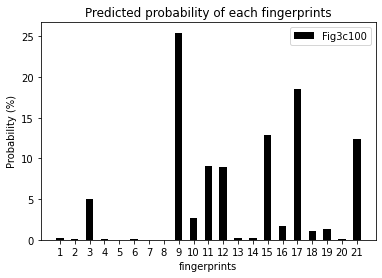

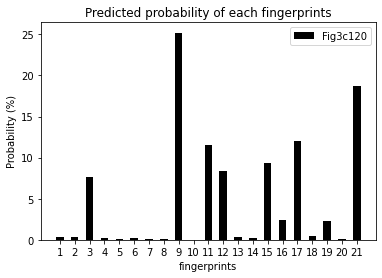

elapsed time =  16.56375300000036  s


In [ ]:
tic = time.clock()
ind = range(1, 22)
i = 0
VER = 100 * np.absolute(KarimiJafari_COEFF[3:24, i]) \
/ np.sum(np.absolute(KarimiJafari_COEFF[3:24, i]))
plt.bar(ind, VER, color = 'black', width = 0.5, label = ListKarimiJafari[i])
plt.xlabel('fingerprints')
plt.ylabel('Probability (%)')
plt.title('Predicted probability of each fingerprints')
plt.xticks(ind)
plt.legend(loc='best')
plt.savefig(ListKarimiJafari[i]+'.png',dpi=600)
plt.show()
i = i + 1
VER = 100 * np.absolute(KarimiJafari_COEFF[3:24, i]) \
/ np.sum(np.absolute(KarimiJafari_COEFF[3:24, i]))
plt.bar(ind, VER, color = 'black', width = 0.5, label = ListKarimiJafari[i])
plt.xlabel('fingerprints')
plt.ylabel('Probability (%)')
plt.title('Predicted probability of each fingerprints')
plt.xticks(ind)
plt.legend(loc='best')
plt.savefig(ListKarimiJafari[i]+'.png',dpi=600)
plt.show()
i = i + 1
VER = 100 * np.absolute(KarimiJafari_COEFF[3:24, i]) \
/ np.sum(np.absolute(KarimiJafari_COEFF[3:24, i]))
plt.bar(ind, VER, color = 'black', width = 0.5, label = ListKarimiJafari[i])
plt.xlabel('fingerprints')
plt.ylabel('Probability (%)')
plt.title('Predicted probability of each fingerprints')
plt.xticks(ind)
plt.legend(loc='best')
plt.savefig(ListKarimiJafari[i]+'.png',dpi=600)
plt.show()
i = i + 1
VER = 100 * np.absolute(KarimiJafari_COEFF[3:24, i]) \
/ np.sum(np.absolute(KarimiJafari_COEFF[3:24, i]))
plt.bar(ind, VER, color = 'black', width = 0.5, label = ListKarimiJafari[i])
plt.xlabel('fingerprints')
plt.ylabel('Probability (%)')
plt.title('Predicted probability of each fingerprints')
plt.xticks(ind)
plt.legend(loc='best')
plt.savefig(ListKarimiJafari[i]+'.png',dpi=600)
plt.show()
i = i + 1
VER = 100 * np.absolute(KarimiJafari_COEFF[3:24, i]) \
/ np.sum(np.absolute(KarimiJafari_COEFF[3:24, i]))
plt.bar(ind, VER, color = 'black', width = 0.5, label = ListKarimiJafari[i])
plt.xlabel('fingerprints')
plt.ylabel('Probability (%)')
plt.title('Predicted probability of each fingerprints')
plt.xticks(ind)
plt.legend(loc='best')
plt.savefig(ListKarimiJafari[i]+'.png',dpi=600)
plt.show()
i = i + 1
VER = 100 * np.absolute(KarimiJafari_COEFF[3:24, i]) \
/ np.sum(np.absolute(KarimiJafari_COEFF[3:24, i]))
plt.bar(ind, VER, color = 'black', width = 0.5, label = ListKarimiJafari[i])
plt.xlabel('fingerprints')
plt.ylabel('Probability (%)')
plt.title('Predicted probability of each fingerprints')
plt.xticks(ind)
plt.legend(loc='best')
plt.savefig(ListKarimiJafari[i]+'.png',dpi=600)
plt.show()
i = i + 1
VER = 100 * np.absolute(KarimiJafari_COEFF[3:24, i]) \
/ np.sum(np.absolute(KarimiJafari_COEFF[3:24, i]))
plt.bar(ind, VER, color = 'black', width = 0.5, label = ListKarimiJafari[i])
plt.xlabel('fingerprints')
plt.ylabel('Probability (%)')
plt.title('Predicted probability of each fingerprints')
plt.xticks(ind)
plt.legend(loc='best')
plt.savefig(ListKarimiJafari[i]+'.png',dpi=600)
plt.show()
i = i + 1
VER = 100 * np.absolute(KarimiJafari_COEFF[3:24, i]) \
/ np.sum(np.absolute(KarimiJafari_COEFF[3:24, i]))
plt.bar(ind, VER, color = 'black', width = 0.5, label = ListKarimiJafari[i])
plt.xlabel('fingerprints')
plt.ylabel('Probability (%)')
plt.title('Predicted probability of each fingerprints')
plt.xticks(ind)
plt.legend(loc='best')
plt.savefig(ListKarimiJafari[i]+'.png',dpi=600)
plt.show()
i = i + 1
VER = 100 * np.absolute(KarimiJafari_COEFF[3:24, i]) \
/ np.sum(np.absolute(KarimiJafari_COEFF[3:24, i]))
plt.bar(ind, VER, color = 'black', width = 0.5, label = ListKarimiJafari[i])
plt.xlabel('fingerprints')
plt.ylabel('Probability (%)')
plt.title('Predicted probability of each fingerprints')
plt.xticks(ind)
plt.legend(loc='best')
plt.savefig(ListKarimiJafari[i]+'.png',dpi=600)
plt.show()
i = i + 1
VER = 100 * np.absolute(KarimiJafari_COEFF[3:24, i]) \
/ np.sum(np.absolute(KarimiJafari_COEFF[3:24, i]))
plt.bar(ind, VER, color = 'black', width = 0.5, label = ListKarimiJafari[i])
plt.xlabel('fingerprints')
plt.ylabel('Probability (%)')
plt.title('Predicted probability of each fingerprints')
plt.xticks(ind)
plt.legend(loc='best')
plt.savefig(ListKarimiJafari[i]+'.png',dpi=600)
plt.show() 
toc = time.clock()
print('elapsed time = ', toc - tic, ' s')

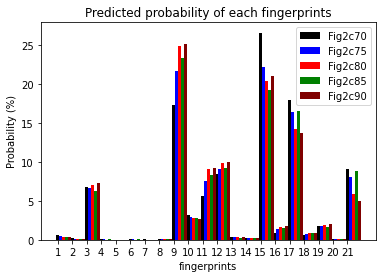

elapsed time =  0.40809400000034657  s


In [ ]:
tic = time.clock()
ind = np.linspace(1,21,21)
width = 0.2
i = 0
VER = 100 * np.absolute(KarimiJafari_COEFF[3:24, i]) \
/ np.sum(np.absolute(KarimiJafari_COEFF[3:24, i]))
plt.bar(ind + i * width, VER, color = 'black', width = width, label = ListKarimiJafari[i])
i = i + 1
VER = 100 * np.absolute(KarimiJafari_COEFF[3:24, i]) \
/ np.sum(np.absolute(KarimiJafari_COEFF[3:24, i]))
plt.bar(ind + i * width, VER, color = 'blue', width = width, label = ListKarimiJafari[i])
i = i + 1
VER = 100 * np.absolute(KarimiJafari_COEFF[3:24, i]) \
/ np.sum(np.absolute(KarimiJafari_COEFF[3:24, i]))
plt.bar(ind + i * width, VER, color = 'red', width = width, label = ListKarimiJafari[i])
i = i + 1
VER = 100 * np.absolute(KarimiJafari_COEFF[3:24, i]) \
/ np.sum(np.absolute(KarimiJafari_COEFF[3:24, i]))
plt.bar(ind + i * width, VER, color = 'green', width = width, label = ListKarimiJafari[i])
i = i + 1
VER = 100 * np.absolute(KarimiJafari_COEFF[3:24, i]) \
/ np.sum(np.absolute(KarimiJafari_COEFF[3:24, i]))
plt.bar(ind + i * width, VER, color = 'maroon', width = width, label = ListKarimiJafari[i])
plt.xlabel('fingerprints')
plt.ylabel('Probability (%)')
plt.title('Predicted probability of each fingerprints')
plt.legend(loc='best')
plt.xticks(ind)
plt.show() 
#plt.savefig('KarimiJafari_fig2.png',dpi=600)
toc = time.clock()
print('elapsed time = ', toc - tic, ' s')

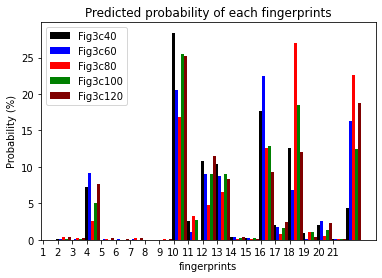

elapsed time =  0.45561500000076194  s


In [ ]:
tic = time.clock()
ind = np.linspace(1,21,21)
width = 0.2
i = 5
VER = 100 * np.absolute(KarimiJafari_COEFF[3:24, i]) \
/ np.sum(np.absolute(KarimiJafari_COEFF[3:24, i]))
plt.bar(ind + i * width, VER, color = 'black', width = width, label = ListKarimiJafari[i])
i = i + 1
VER = 100 * np.absolute(KarimiJafari_COEFF[3:24, i]) \
/ np.sum(np.absolute(KarimiJafari_COEFF[3:24, i]))
plt.bar(ind + i * width, VER, color = 'blue', width = width, label = ListKarimiJafari[i])
i = i + 1
VER = 100 * np.absolute(KarimiJafari_COEFF[3:24, i]) \
/ np.sum(np.absolute(KarimiJafari_COEFF[3:24, i]))
plt.bar(ind + i * width, VER, color = 'red', width = width, label = ListKarimiJafari[i])
i = i + 1
VER = 100 * np.absolute(KarimiJafari_COEFF[3:24, i]) \
/ np.sum(np.absolute(KarimiJafari_COEFF[3:24, i]))
plt.bar(ind + i * width, VER, color = 'green', width = width, label = ListKarimiJafari[i])
i = i + 1
VER = 100 * np.absolute(KarimiJafari_COEFF[3:24, i]) \
/ np.sum(np.absolute(KarimiJafari_COEFF[3:24, i]))
plt.bar(ind + i * width, VER, color = 'maroon', width = width, label = ListKarimiJafari[i])
plt.xlabel('fingerprints')
plt.ylabel('Probability (%)')
plt.title('Predicted probability of each fingerprints')
plt.legend(loc='best')
plt.xticks(ind)
plt.show() 
#plt.savefig('KarimiJafari_fig3.png',dpi=600)
toc = time.clock()
print('elapsed time = ', toc - tic, ' s')

## Getting In-Line data of Soares and Carneiro, 2013

### Link to source: 

In [ ]:
print('In-Line data as reported in paper: ')
print('Cryst. Growth Des. 2013, 13, 4, 1510–1517')
print('https://pubs.acs.org/doi/10.1021/cg3017112')

In-Line data as reported in paper: 
Cryst. Growth Des. 2013, 13, 4, 1510–1517
https://pubs.acs.org/doi/10.1021/cg3017112


### **Fig_6** : Processing

exp_Inline_Fig_6.png as deposited on HDD


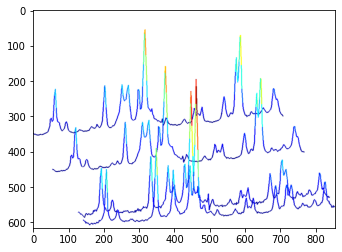

purging white out ...
purged white background


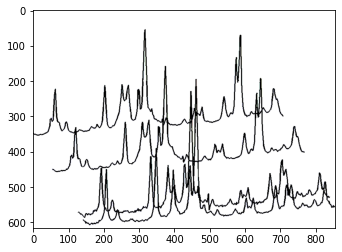

detected pixels to actual data -with some noise-


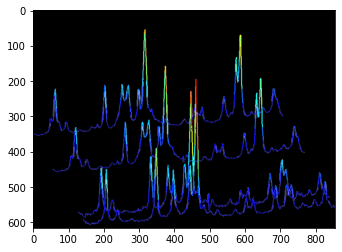

elapsed time =  4.098776999999245  s


In [ ]:
tic = time.clock()
myIMG = cv2.imread('exp_Inline_Fig_6.png') 
myIMG = cv2.cvtColor(myIMG, cv2.COLOR_BGR2RGB)
print('exp_Inline_Fig_6.png as deposited on HDD')
plt.imshow(myIMG)
plt.show()
hsv_myIMG = cv2.cvtColor(myIMG, cv2.COLOR_RGB2HSV)
print('purging white out ...')
light = (0, 0, 200) 
dark = (145, 60, 255)
mask = cv2.inRange(hsv_myIMG, light, dark)
result = cv2.bitwise_and(myIMG, myIMG, mask=mask)
print('purged white background')
plt.imshow(result)
plt.show()
print('detected pixels to actual data -with some noise-')
SPECTRA = myIMG - result
plt.imshow(SPECTRA)
plt.show()
DATA = np.zeros((SPECTRA.shape[0],SPECTRA.shape[1]))
for x in range(SPECTRA.shape[0]):
  for y in range(SPECTRA.shape[1]):
    RED = SPECTRA[x,y,0]
    GREEN = SPECTRA[x,y,1]
    BLUE = SPECTRA[x,y,2]
    if (RED == 0):
      if (GREEN == 0):
        if (BLUE == 0):
          DATA[x,y] = 0
    else:
      DATA[x,y] = 1
np.savetxt("exp_Inline_Fig_6.csv", DATA, delimiter=",")
toc = time.clock()
print('elapsed time = ', toc - tic, ' s')

### **Fig_9** : Processing

exp_Inline_Fig_9.png as deposited on HDD


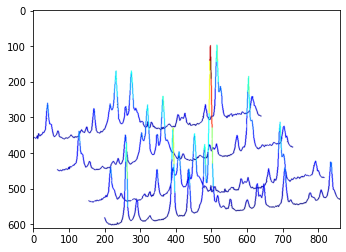

purging white out ...
purged white background


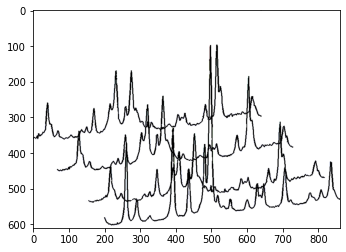

detected pixels to actual data -with some noise-


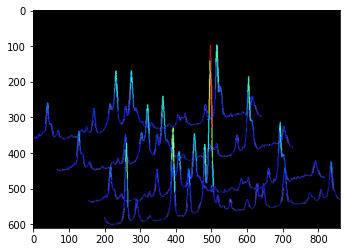

elapsed time =  4.968597999999474  s


In [ ]:
tic = time.clock()
myIMG = cv2.imread('exp_Inline_Fig_9.png') 
myIMG = cv2.cvtColor(myIMG, cv2.COLOR_BGR2RGB)
print('exp_Inline_Fig_9.png as deposited on HDD')
plt.imshow(myIMG)
plt.show()
hsv_myIMG = cv2.cvtColor(myIMG, cv2.COLOR_RGB2HSV)
print('purging white out ...')
light = (0, 0, 200) 
dark = (145, 60, 255)
mask = cv2.inRange(hsv_myIMG, light, dark)
result = cv2.bitwise_and(myIMG, myIMG, mask=mask)
print('purged white background')
plt.imshow(result)
plt.show()
print('detected pixels to actual data -with some noise-')
SPECTRA = myIMG - result
plt.imshow(SPECTRA)
plt.show()
DATA = np.zeros((SPECTRA.shape[0],SPECTRA.shape[1]))
for x in range(SPECTRA.shape[0]):
  for y in range(SPECTRA.shape[1]):
    RED = SPECTRA[x,y,0]
    GREEN = SPECTRA[x,y,1]
    BLUE = SPECTRA[x,y,2]
    if (RED == 0):
      if (GREEN == 0):
        if (BLUE == 0):
          DATA[x,y] = 0
    else:
      DATA[x,y] = 1
np.savetxt("exp_Inline_Fig_9.csv", DATA, delimiter=",")
toc = time.clock()
print('elapsed time = ', toc - tic, ' s')

### **Fig_12** : Processing

exp_Inline_Fig_12.png as deposited on HDD


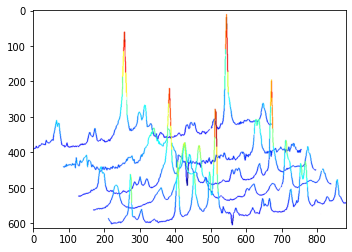

purging white out ...
purged white background


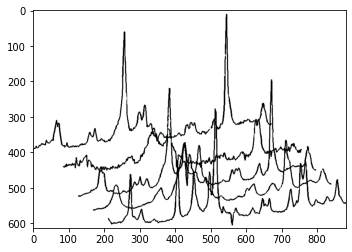

detected pixels to actual data -with some noise-


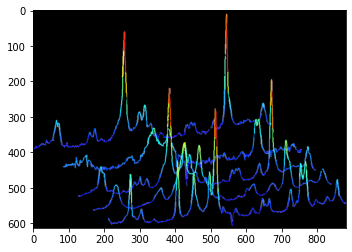

elapsed time =  5.932302000001073  s


In [ ]:
tic = time.clock()
myIMG = cv2.imread('exp_Inline_Fig_12.png') 
myIMG = cv2.cvtColor(myIMG, cv2.COLOR_BGR2RGB)
print('exp_Inline_Fig_12.png as deposited on HDD')
plt.imshow(myIMG)
plt.show()
hsv_myIMG = cv2.cvtColor(myIMG, cv2.COLOR_RGB2HSV)
print('purging white out ...')
light = (0, 0, 200) 
dark = (145, 60, 255)
mask = cv2.inRange(hsv_myIMG, light, dark)
result = cv2.bitwise_and(myIMG, myIMG, mask=mask)
print('purged white background')
plt.imshow(result)
plt.show()
print('detected pixels to actual data -with some noise-')
SPECTRA = myIMG - result
plt.imshow(SPECTRA)
plt.show()
DATA = np.zeros((SPECTRA.shape[0],SPECTRA.shape[1]))
for x in range(SPECTRA.shape[0]):
  for y in range(SPECTRA.shape[1]):
    RED = SPECTRA[x,y,0]
    GREEN = SPECTRA[x,y,1]
    BLUE = SPECTRA[x,y,2]
    if (RED == 0):
      if (GREEN == 0):
        if (BLUE == 0):
          DATA[x,y] = 0
    else:
      DATA[x,y] = 1
np.savetxt("exp_Inline_Fig_12.csv", DATA, delimiter=",")
toc = time.clock()
print('elapsed time = ', toc - tic, ' s')

### Loading data back 

In [ ]:
tic = time.clock()
file = 'Soares_RT.xlsx'
xl = pd.ExcelFile(file)
ListSoares_RT = xl.sheet_names
xs = np.linspace(200, 1700, 1000)
Soares_RT = np.zeros((len(xs),len(ListSoares_RT)))
Soares_RT_norm = np.zeros((len(xs),len(ListSoares_RT)))
i = 0
for item in ListSoares_RT: 
  data = xl.parse(item)
  np_data = data.to_numpy()
  x = np_data[:, 0]
  y = np_data[:, 1]
  spl = UnivariateSpline(x, y)
  spl.set_smoothing_factor(1)
  ys = spl(xs)
  Soares_RT[:,i] = ys
  MIN = ys.min()
  if MIN == 0:
    MIN = 1e-8
  MAX = ys.max()
  Soares_RT_norm[:,i] = (ys - MIN) / (MAX - MIN)
  i = i + 1
toc = time.clock()
print('elapsed time = ', toc - tic, ' s')

elapsed time =  7.84203000000025  s


In [ ]:
Soares_RT_ERR = np.zeros((Soares_RT_norm.shape[1],1))
Soares_RT_COEFF = np.zeros((MATRIX.shape[1],Soares_RT_norm.shape[1]))
for soares_rt in range(Soares_RT_norm.shape[1]):
    Y = Soares_RT_norm[:, soares_rt]
    tMATRIX_Y = np.matmul(tMATRIX, Y) 
    Soares_RT_COEFF[:, soares_rt] = np.matmul(inv_tMATRIX_MATRIX, tMATRIX_Y)
    Y_cal = np.matmul(MATRIX, Soares_RT_COEFF[:, soares_rt])
    Err = abs(Y - Y_cal)
    Soares_RT_ERR[soares_rt,0] = Err.sum()
toc = time.clock()
print('elapsed time = ', toc - tic, ' s')

elapsed time =  104.81397400000014  s


2


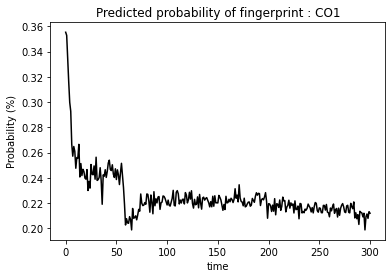

3


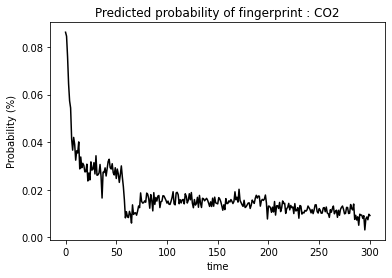

4


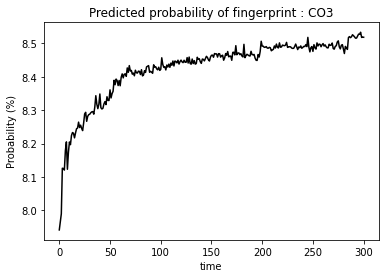

5


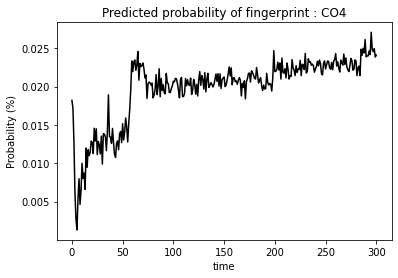

6


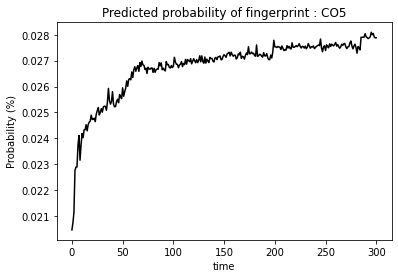

7


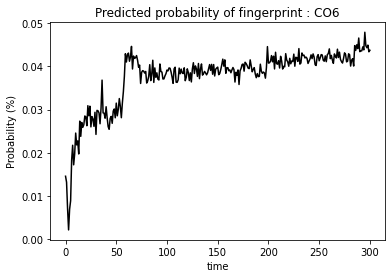

8


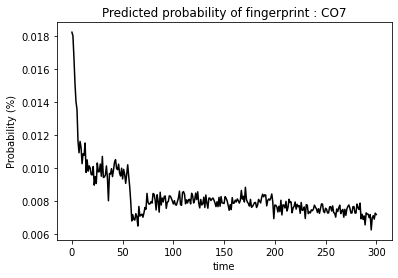

9


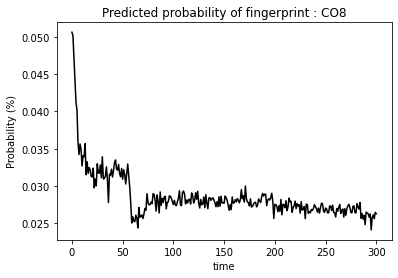

10


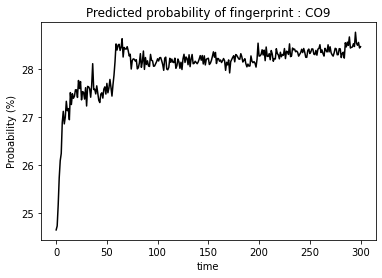

11


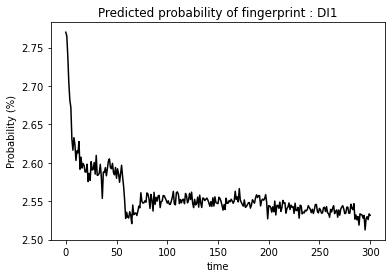

12


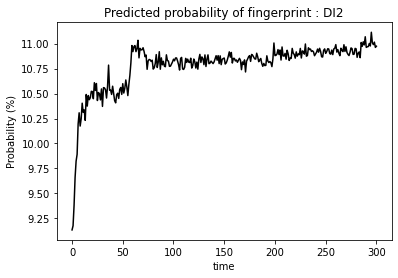

13


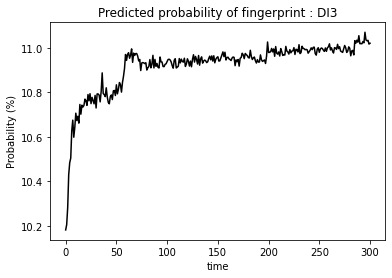

14


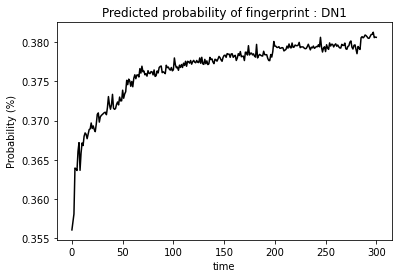

15


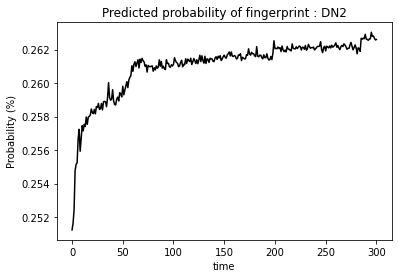

16


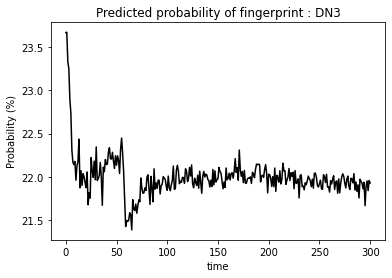

17


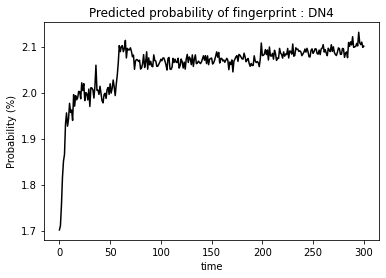

18


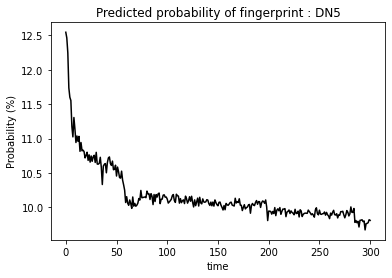

19


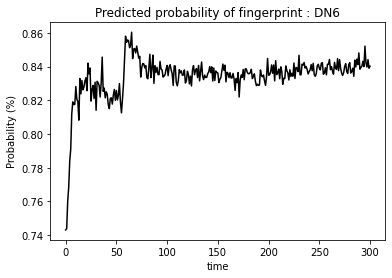

20


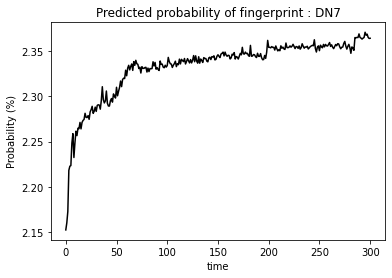

21


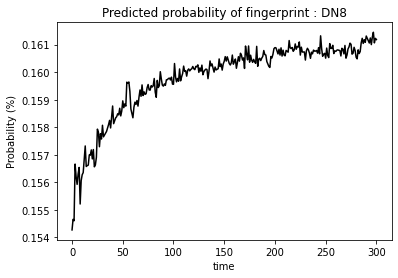

22


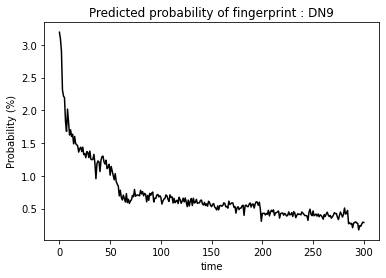

elapsed time =  3.7799709999999322  s


In [ ]:
tic = time.clock()
Time = range(0, 301)
SUM = np.zeros((1, Soares_RT_COEFF.shape[1]))
for times in range(Soares_RT_COEFF.shape[1]):
  SUM[0,times] = np.sum(np.absolute(Soares_RT_COEFF[3:24, times]))
for i in range(2,23):
  print(i)
  #VER = 100 * np.absolute(Soares_RT_COEFF[3:24, i]) \
  #/ np.sum(np.absolute(Soares_RT_COEFF[3:24, i]))
  VER = 100 * np.absolute(Soares_RT_COEFF[i+1, :]) \
  / SUM[0,:]
  plt.plot(Time, VER, color = 'black')
  plt.xlabel('time')
  plt.ylabel('Probability (%)')
  plt.title('Predicted probability of fingerprint : ' + List[i])
  #plt.savefig(List[i]+'.png',dpi=600)
  plt.show()
toc = time.clock()
print('elapsed time = ', toc - tic, ' s')

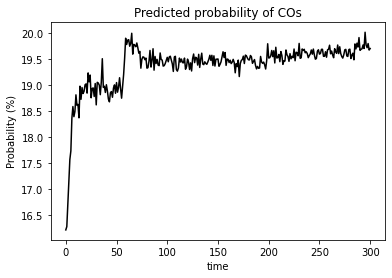

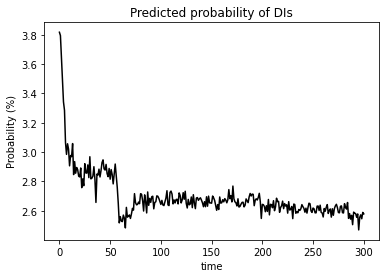

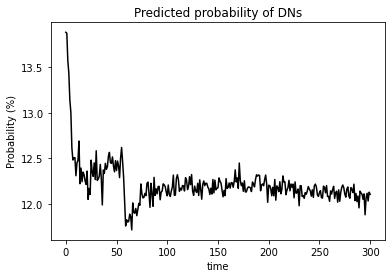

In [ ]:
VER = 100 * np.absolute(Soares_RT_COEFF[3, :]+Soares_RT_COEFF[4, :]+\
                        Soares_RT_COEFF[5, :]+Soares_RT_COEFF[6, :]+\
                        Soares_RT_COEFF[7, :]+Soares_RT_COEFF[8, :]+\
                        Soares_RT_COEFF[9, :]+Soares_RT_COEFF[10, :]+\
                        Soares_RT_COEFF[11, :]) / SUM[0,:]
plt.plot(Time, VER, color = 'black')
plt.xlabel('time')
plt.ylabel('Probability (%)')
plt.title('Predicted probability of COs')
plt.savefig('COs.png',dpi=600)
plt.show()
VER = 100 * np.absolute(Soares_RT_COEFF[12, :]+Soares_RT_COEFF[13, :]+\
                        Soares_RT_COEFF[14, :]) / SUM[0,:]
plt.plot(Time, VER, color = 'black')
plt.xlabel('time')
plt.ylabel('Probability (%)')
plt.title('Predicted probability of DIs')
plt.savefig('DIs.png',dpi=600)
plt.show()
VER = 100 * np.absolute(Soares_RT_COEFF[15, :]+Soares_RT_COEFF[16, :]+\
                        Soares_RT_COEFF[17, :]+Soares_RT_COEFF[18, :]+\
                        Soares_RT_COEFF[19, :]+Soares_RT_COEFF[20, :]+\
                        Soares_RT_COEFF[21, :]+Soares_RT_COEFF[22, :]+\
                        Soares_RT_COEFF[23, :]) / SUM[0,:]
plt.plot(Time, VER, color = 'black')
plt.xlabel('time')
plt.ylabel('Probability (%)')
plt.title('Predicted probability of DNs')
plt.savefig('DNs.png',dpi=600)
plt.show()